In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/kavya/Downloads/EDA1 (1)/EDA1/Cardiotocographic.csv")

df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [24]:

missing_values = df.isnull().sum()

# 1: Remove rows with missing values
df_cleaned = df.dropna()


In [25]:

print(df.dtypes)



LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [26]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [11]:

statistical_summary = df_cleaned.describe()

print(statistical_summary)


               LB          AC          FM          UC          DL     DS  \
count  885.000000  885.000000  898.000000  898.000000  898.000000  885.0   
mean   131.846366    0.004094    0.000604    0.004965    0.001543    0.0   
std      9.453055    0.003752    0.001344    0.002706    0.002213    0.0   
min    106.000000   -0.000122   -0.002467   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003145    0.000000    0.0   
50%    133.000000    0.003358    0.000000    0.005045    0.000000    0.0   
75%    138.000000    0.006747    0.000303    0.006928    0.003076    0.0   
max    160.000000    0.014068    0.006272    0.012072    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  885.0  898.000000  898.000000  898.000000  885.000000  885.000000   
mean     0.0   42.453496    1.273574    3.146072    8.595633   67.757776   
std      0.0   15.055401    0.541507    6.027415    4.498767   32.580868   
min      0.

In [13]:

high_std = statistical_summary.loc['std'] > 10  
print("High Standard Deviation Columns:", high_std[high_std].index.tolist())


High Standard Deviation Columns: ['ASTV', 'Width']


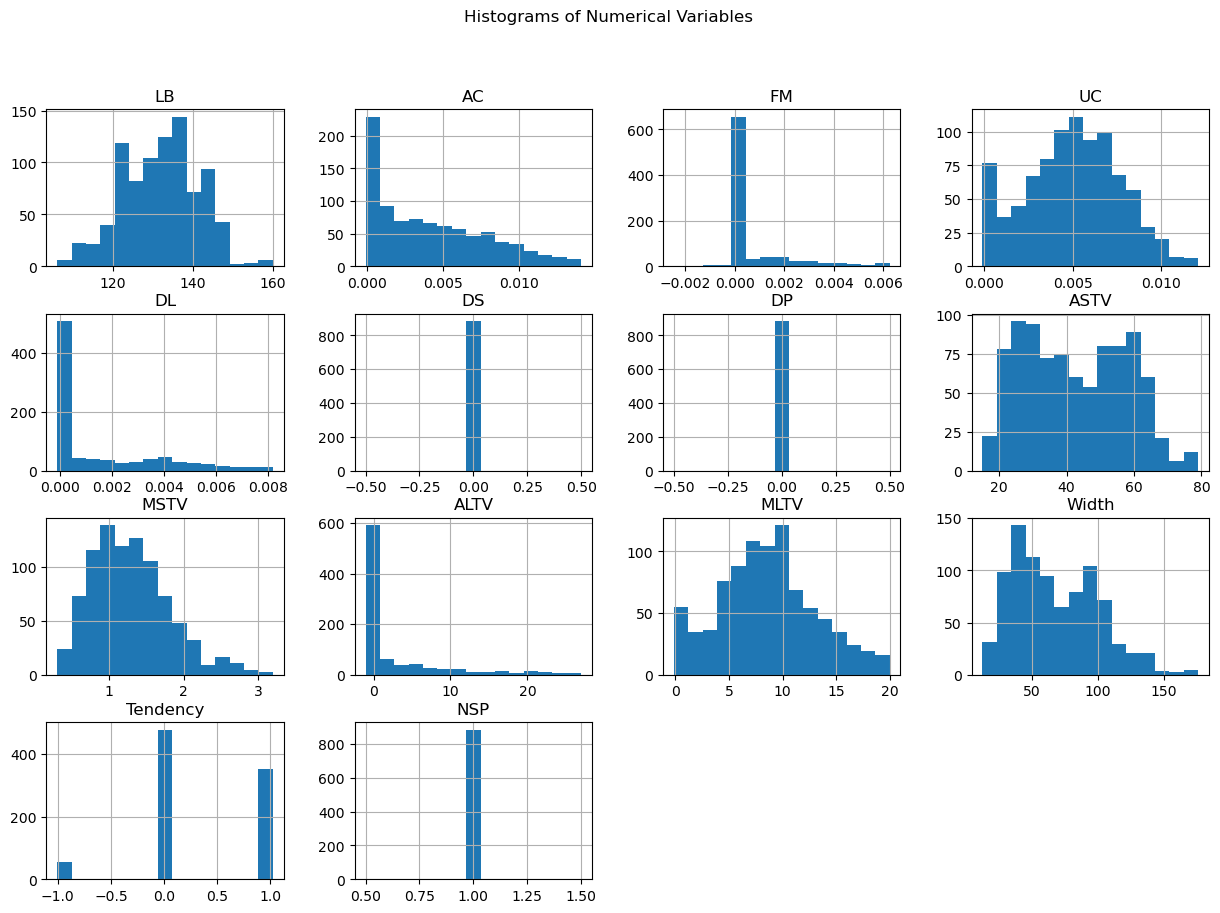

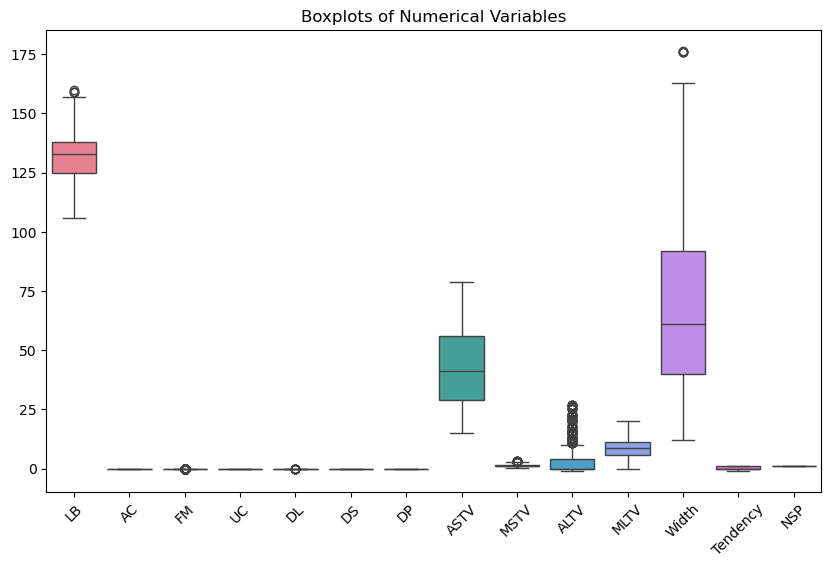

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned)
plt.title('Boxplots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()


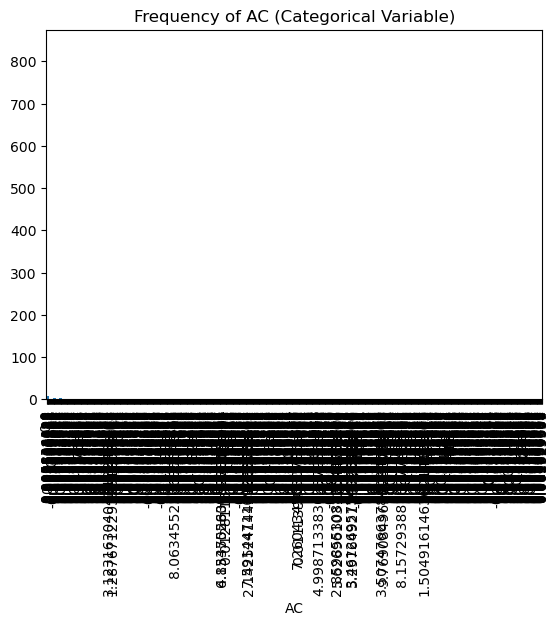

In [16]:

# Example with a real categorical column
df['AC'].value_counts().plot(kind='bar')  
plt.title('Frequency of AC (Categorical Variable)')
plt.show()


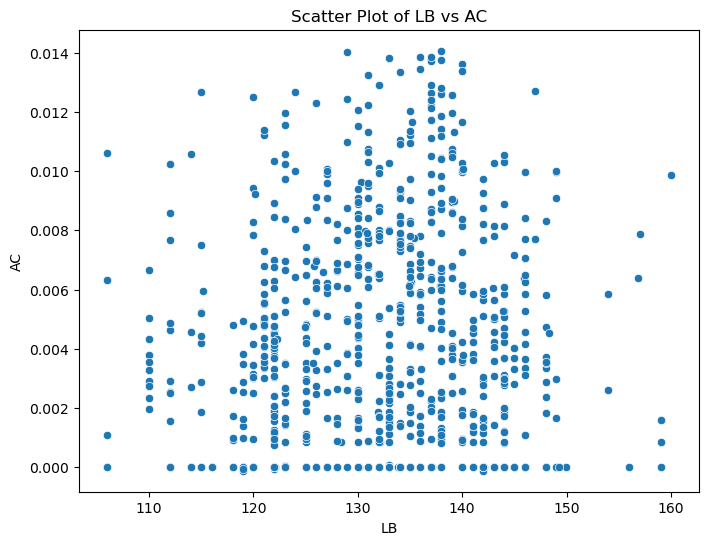

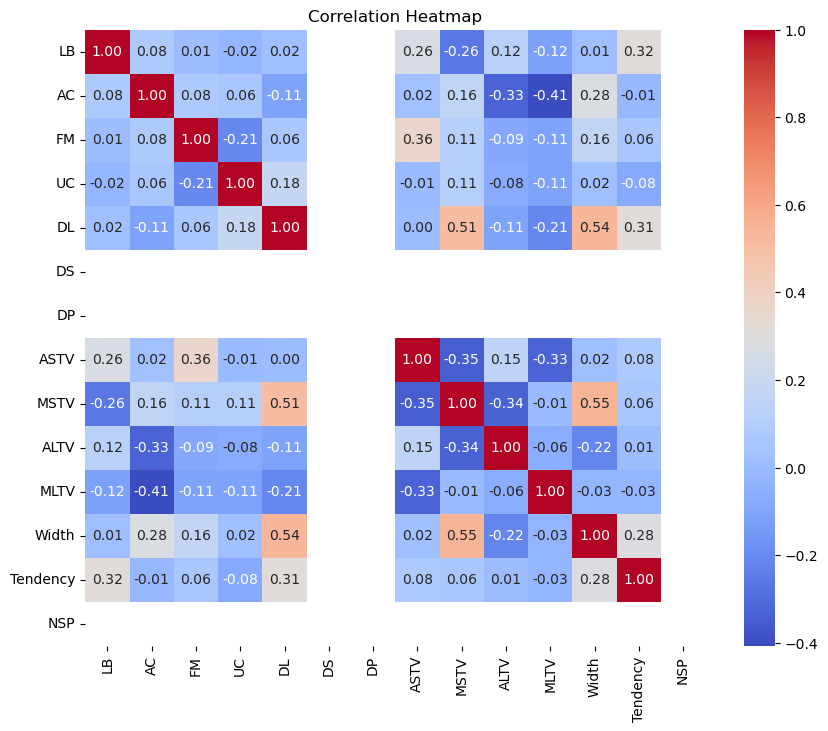

In [18]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='LB', y='AC')
plt.title('Scatter Plot of LB vs AC')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


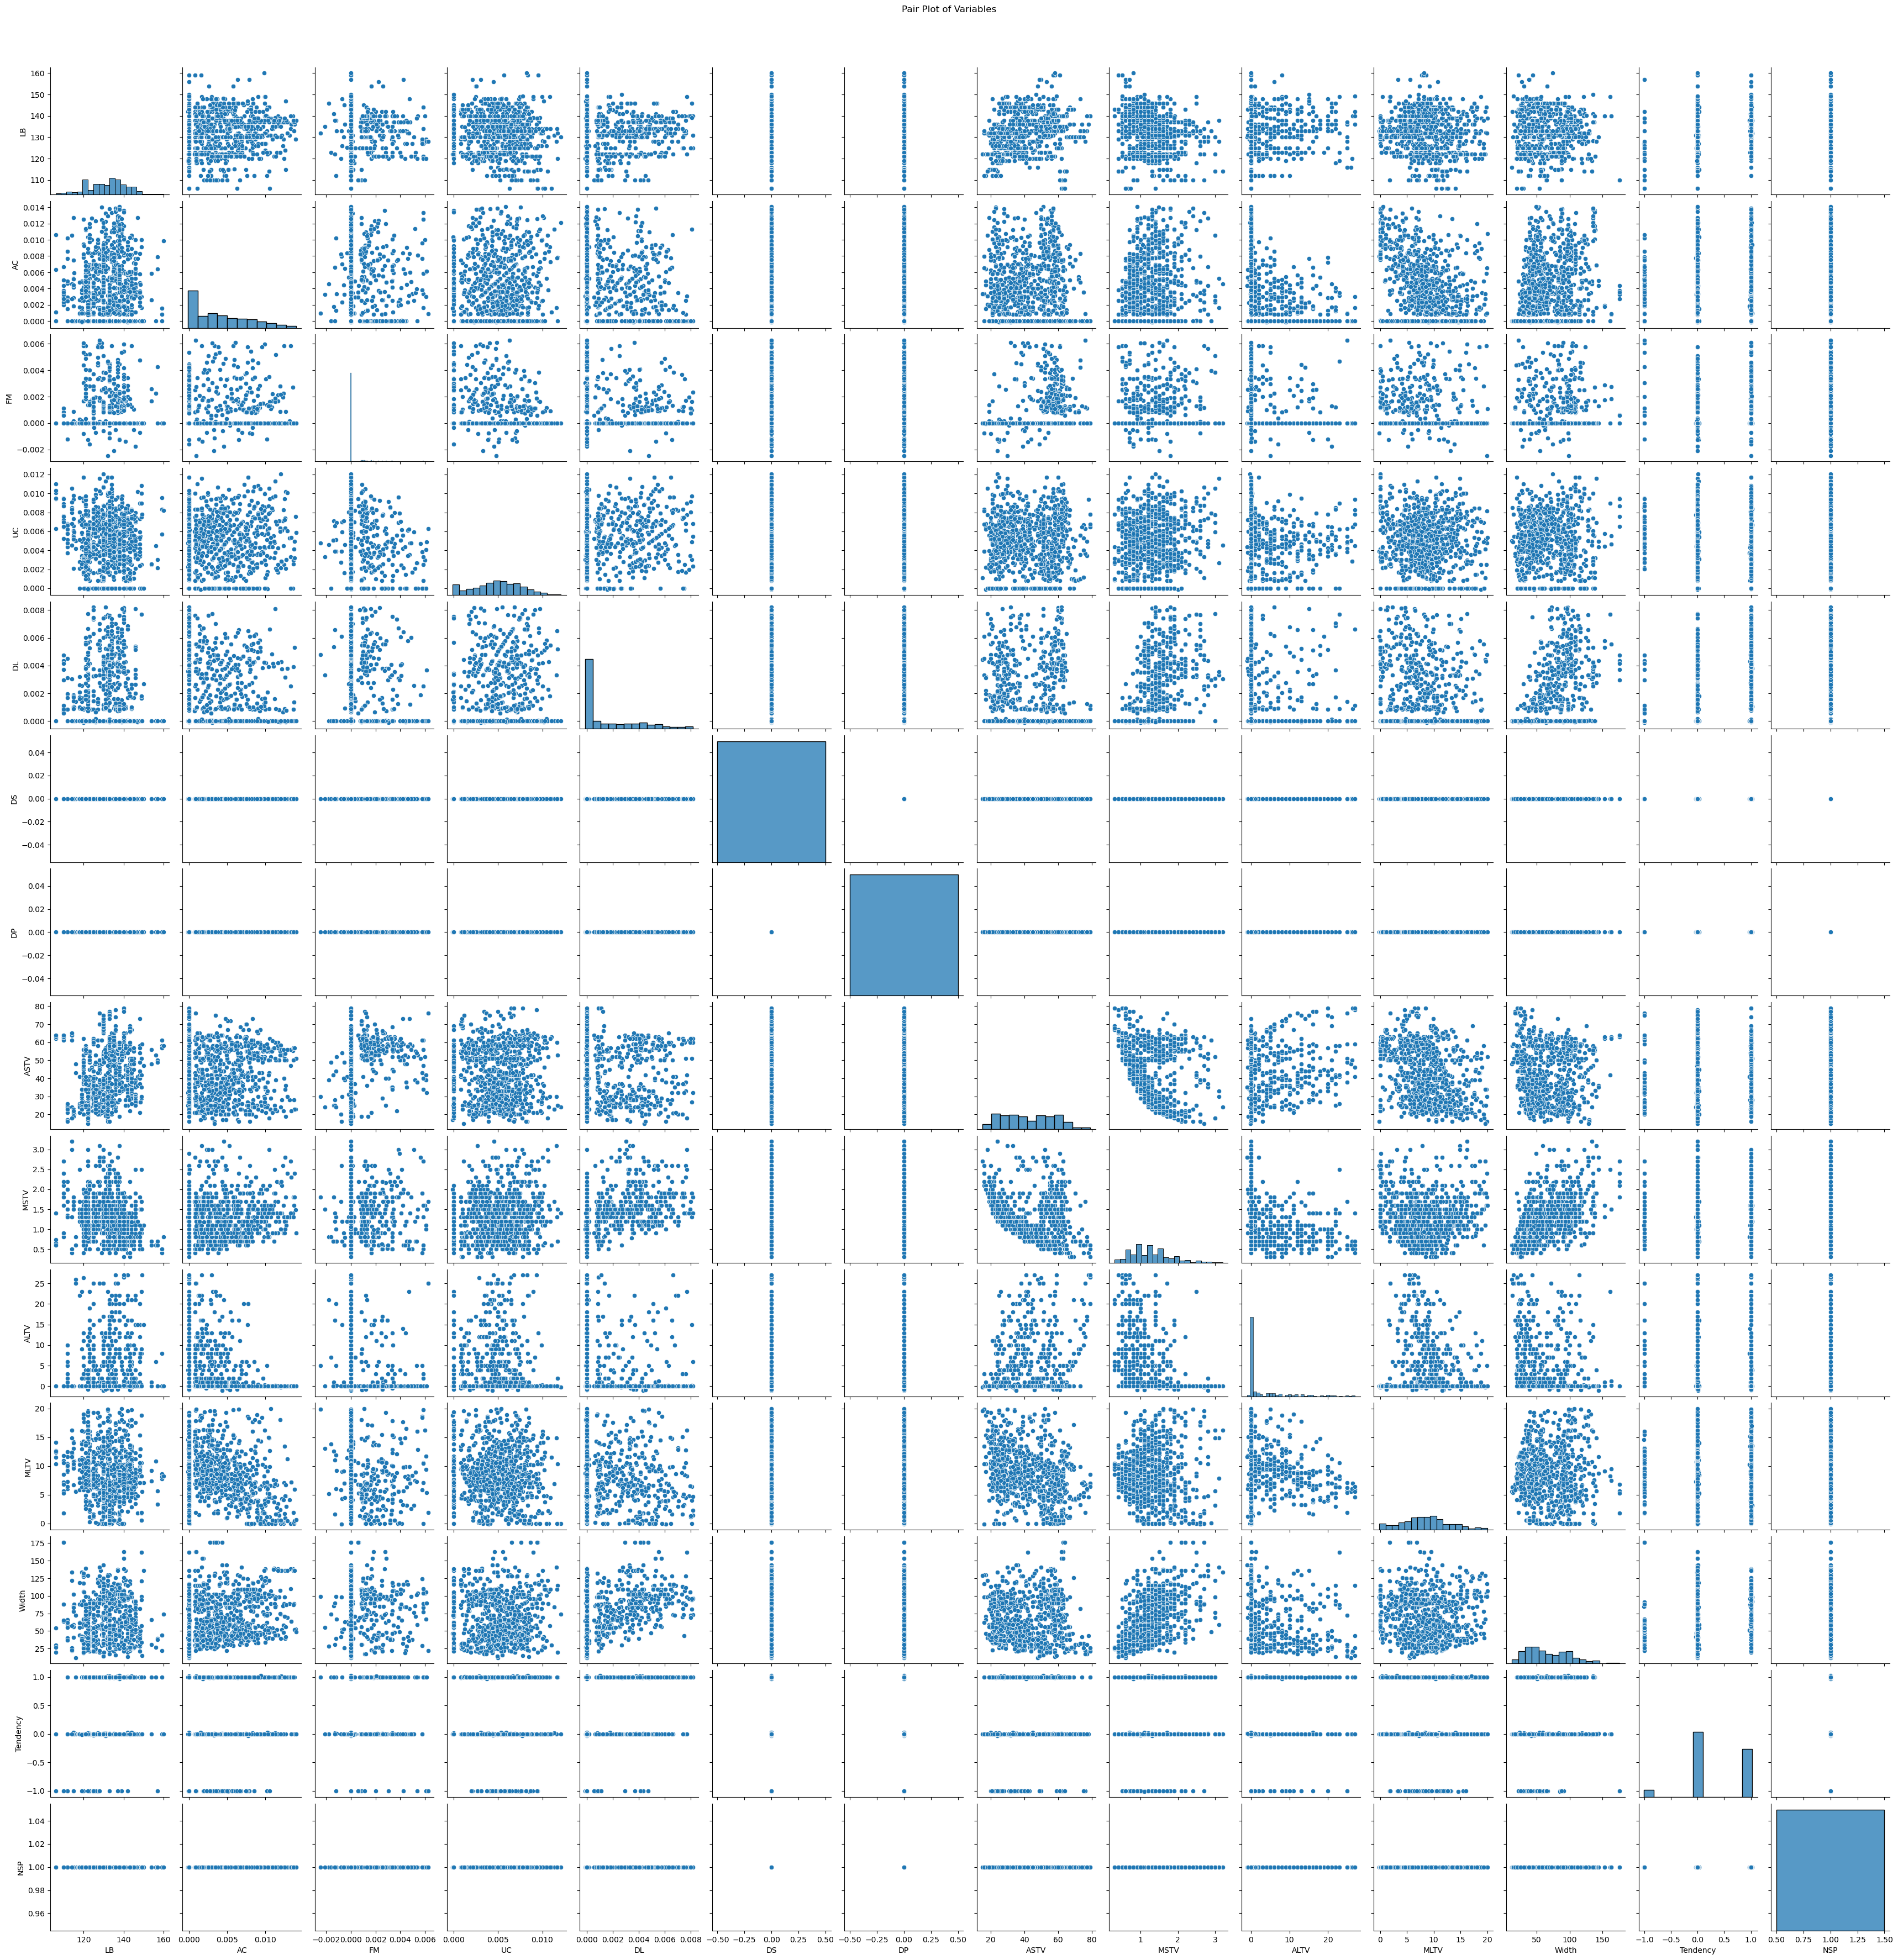

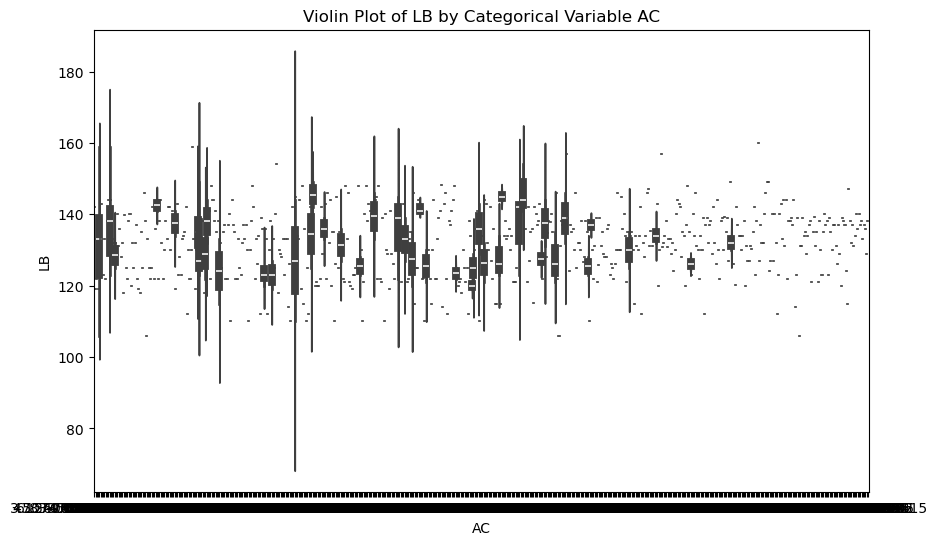

In [19]:

# Pair Plot
sns.pairplot(df_cleaned.select_dtypes(include=[np.number])) 
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='AC', y='LB', data=df_cleaned)  
plt.title('Violin Plot of LB by Categorical Variable AC')
plt.show()


In [20]:
strong_correlations = correlation_matrix[correlation_matrix.abs() > 0.5]
print("Strong Correlations:\n", strong_correlations)



Strong Correlations:
            LB   AC   FM   UC        DL  DS  DP  ASTV      MSTV  ALTV  MLTV  \
LB        1.0  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
AC        NaN  1.0  NaN  NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
FM        NaN  NaN  1.0  NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
UC        NaN  NaN  NaN  1.0       NaN NaN NaN   NaN       NaN   NaN   NaN   
DL        NaN  NaN  NaN  NaN  1.000000 NaN NaN   NaN  0.509189   NaN   NaN   
DS        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
DP        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
ASTV      NaN  NaN  NaN  NaN       NaN NaN NaN   1.0       NaN   NaN   NaN   
MSTV      NaN  NaN  NaN  NaN  0.509189 NaN NaN   NaN  1.000000   NaN   NaN   
ALTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN   1.0   NaN   
MLTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN   NaN   1.0   
Width     NaN  NaN  NaN  NaN  0.541002 NaN